In [41]:
import numpy as np
import random as rd
import scipy as sc
import time

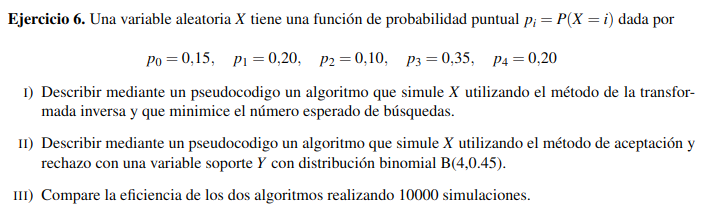

i) para poder minimizar el numero esperado de busquedas, en el algoritmo al realizar las comparaciones con los valores de probabilidad, lo hago empezando por los valores que mayor probabilidad tienen. 

In [11]:
prob_X = [(0, 0.15),
          (1, 0.20), 
          (2, 0.10),
          (3, 0.35),
          (4, 0.20)]

#ordeno las probabildades de mayor a menor 
prob_X.sort(key=lambda x: x[1], reverse=True)
# de modo que si quiero el valor 4, le corresponde el indice 0
print(prob_X)

[(3, 0.35), (1, 0.2), (4, 0.2), (0, 0.15), (2, 0.1)]


In [72]:
def transf_inversa():
    u = rd.random()
    acum = 0

    for i in range(len(prob_X)):
        acum += prob_X[i][1]
        if u < acum:
            return prob_X[i][0]
        
def simulacion_transf_inv(nsims):
    simulaciones = []
    for i in range(nsims):
        simulaciones.append(transf_inversa())

    return simulaciones


ii) para realizarlo con el metodo de aceptacion y rechazo, debo definir mi c y mi pj y qj. 
como $c \leq \frac{P(X = x_i)}{P(Y = y_i)}$

Tomara valor maximo cuando $p_i$ tome el valor maximo y $q_i$ tome el valor minimo.

calculo los $q_i$ y c = max($p_i$/$q_i$)

In [44]:
# genero una binomial con n = 4 y p = 0.45
# y calculo los valores para 0, 1, 2, 3, 4
n = 4
p = 0.45
prob_binom = [sc.stats.binom.pmf(i, n, p) for i in range(n+1)]
print(prob_binom)

c = max(x[1] for x in prob_X) / max(prob_binom)

[0.09150625000000004, 0.2994750000000002, 0.3675375000000002, 0.20047500000000004, 0.04100625]


In [45]:
# ya teniendo mi c, puedo realizar el metodo de aceptacion y rechazo

def aceptacion_rechazo():
    while True:
        # genero un valor de la binomial, valdra entre 0 y n
        Y = sc.stats.binom.rvs(n, p)
        # genero un valor aleatorio
        u = rd.random()
        if u < ( prob_X[Y][1] / (c * prob_binom[Y])):
            return Y
        
def simulacion_acep_rechazo(nsims):
    simulaciones = []
    for i in range(nsims):
        simulaciones.append(aceptacion_rechazo())
        
    return simulaciones

In [83]:
nsims = 10000

start = time.time()
simulacion_transf_inv(nsims)
end = time.time()
print("Tiempo de ejecucion para transf_inv: ", end - start)

start = time.time()
simulacion_acep_rechazo(nsims)
end = time.time()
print("Tiempo de ejecucion para aceptacion y rechazo: ", end - start)


Tiempo de ejecucion para transf_inv:  0.0032243728637695312
Tiempo de ejecucion para aceptacion y rechazo:  0.3387889862060547
